In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [283]:
file_path = 'BDF_Tresor_2004_2008_maturites10_quotidien.csv'
data = pd.read_csv(file_path, delimiter = ";",index_col=0, header=0 )
data.index=pd.to_datetime(data.index, yearfirst= True)

C:\Users\mathi\AppData\Local\Temp\ipykernel_20976\1790908221.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data.index=pd.to_datetime(data.index, yearfirst= True)


In [560]:
data2= data[data.index>"2024-05-15"]
maturite = np.array([1,2,3,5,7,10,15,20])
data2 = data2.drop(columns=['25', '30'])
data2 = data2.replace(np.nan, 0)


C:\Users\mathi\AppData\Local\Temp\ipykernel_20976\580674273.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(legend)


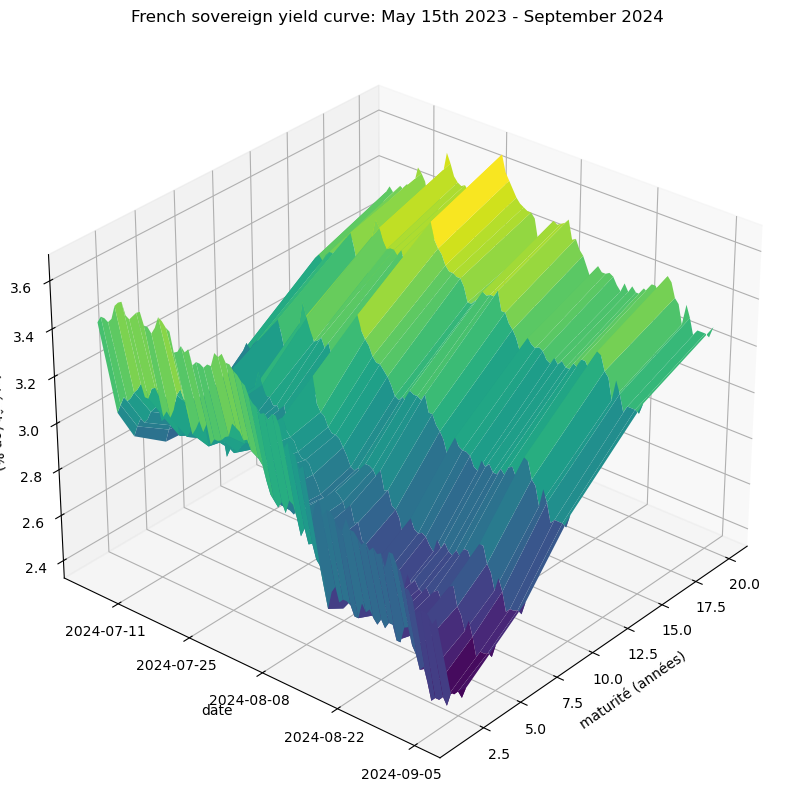

In [568]:
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')



maturite = np.array([1,2,3,5,7,10,15,20])

dates = data2.index
x = np.arange(len(dates))  # Numeric x-axis based on date range

valeurs = data2.values
X,maturite_grid = np.meshgrid(x, maturite)

date_labels = mdates.date2num(dates)

# Plot the surface.
legend = np.array([dates.date[int(i)] for i in np.linspace(0,len(dates)-1,10)])

#ax.plot_surface(maturite,date_labels[X[0]], data2.values.transpose(), cmap='viridis')
ax.plot_surface(maturite_grid,X, data2.values.transpose(), cmap='viridis')
#ax.set_yticklabels([1,2,3])
ax.set_yticklabels(legend)


# Step 5: Set labels
ax.set_xlabel('maturité (années)')
ax.set_ylabel('date')
ax.set_zlabel('intérêt (en %)')


# Update the axis view and title
#ax.view_init(elev, azim, roll)
ax.view_init(30, 220, 0)
plt.title('French sovereign yield curve: May 15th 2023 - September 2024')
plt.draw()
#plt.savefig('yieldcurve.pdf')

plt.grid()



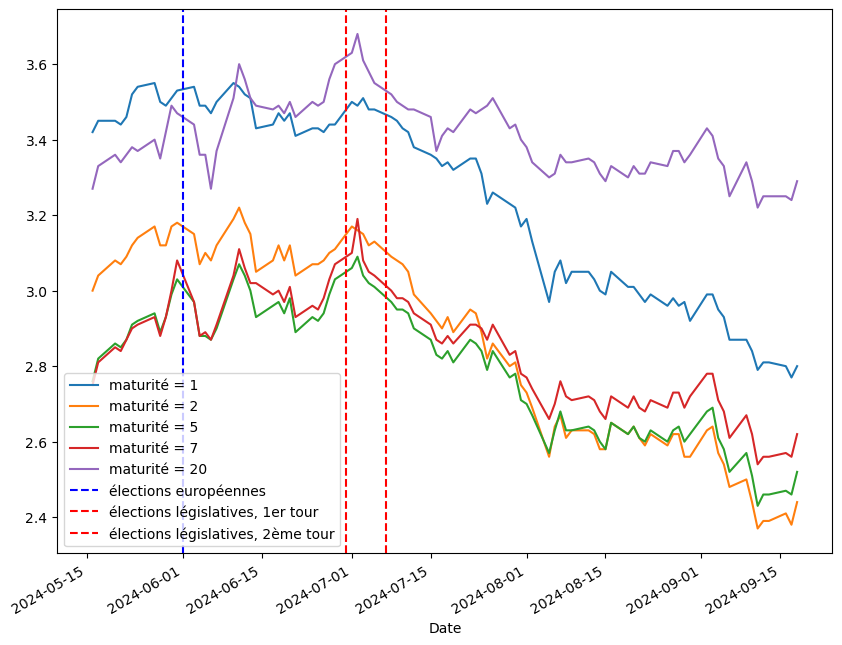

In [712]:
plt.figure(figsize=(10,8))

for i in [1,2, 5,7,20]:
    plottingdata = data2[f'{i}'].apply(pd.to_numeric)
    plottingdata.plot(label=f"maturité = {i}")
    plt.legend()



plt.axvline(x = "2024-06-01", color = 'b',linestyle="--", label = 'élections européennes')
plt.axvline(x = "2024-06-30", color = 'r',linestyle="--", label = 'élections législatives, 1er tour')
plt.axvline(x = "2024-07-07", color = 'r',linestyle="--", label = 'élections législatives, 2ème tour')

#ax.annotate('the top',xy=(np.pi/2., 10.),      # theta, radius xytext=(np.pi/3, 20.),   # theta, radius xycoords='polar',textcoords='polar',arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='left',verticalalignment='bottom',clip_on=True) 
#plt.annotate("Legislatives", xy=(.025, .975), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top',fontsize=20)
plt.legend()

plt.show()


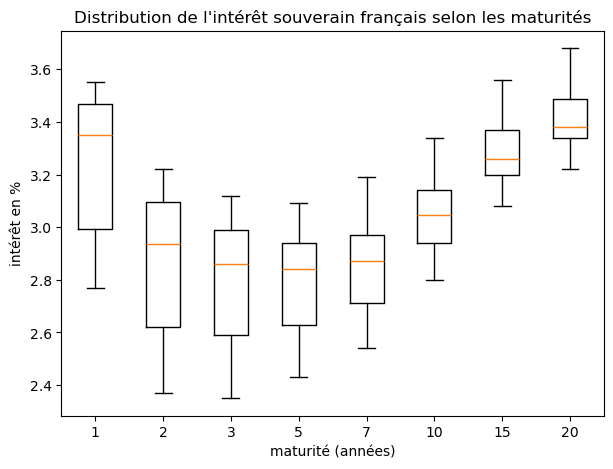

In [772]:
fig, ax = plt.subplots(figsize=(7, 5))

plottingdata = data2.apply(pd.to_numeric)
ax.boxplot(plottingdata.values)
ax.set_xticklabels([1,2,3, 5,7,10,15,20])

ax.set_xlabel('maturité (années)')
ax.set_ylabel('intérêt en %')
plt.title("Distribution de l'intérêt souverain français selon les maturités")




# plt.legend()

#plt.boxplot(data2["3"].apply(pd.to_numeric).values)



#ax.annotate('the top',xy=(np.pi/2., 10.),      # theta, radius xytext=(np.pi/3, 20.),   # theta, radius xycoords='polar',textcoords='polar',arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='left',verticalalignment='bottom',clip_on=True) 
#plt.annotate("Legislatives", xy=(.025, .975), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top',fontsize=20)

plt.show()


In [730]:
help(plt.boxplot)

Help on function boxplot in module matplotlib.pyplot:

boxplot(x: 'ArrayLike | Sequence[ArrayLike]', notch: 'bool | None' = None, sym: 'str | None' = None, vert: 'bool | None' = None, whis: 'float | tuple[float, float] | None' = None, positions: 'ArrayLike | None' = None, widths: 'float | ArrayLike | None' = None, patch_artist: 'bool | None' = None, bootstrap: 'int | None' = None, usermedians: 'ArrayLike | None' = None, conf_intervals: 'ArrayLike | None' = None, meanline: 'bool | None' = None, showmeans: 'bool | None' = None, showcaps: 'bool | None' = None, showbox: 'bool | None' = None, showfliers: 'bool | None' = None, boxprops: 'dict[str, Any] | None' = None, labels: 'Sequence[str] | None' = None, flierprops: 'dict[str, Any] | None' = None, medianprops: 'dict[str, Any] | None' = None, meanprops: 'dict[str, Any] | None' = None, capprops: 'dict[str, Any] | None' = None, whiskerprops: 'dict[str, Any] | None' = None, manage_ticks: 'bool' = True, autorange: 'bool' = False, zorder: 'float